#### Project - 3
##### airline network optimization
###### Prepared for: ExxpertSCM Thoughtware Training Pvt Ltd.

###### Guided by: Mr. Pattabhi Raman
Network optimization, also known as network optimization problem or network flow problem, is a type of mathematical optimization that deals with finding the most efficient way to allocate resources, distribute goods, or route information within a network. The goal is to optimize certain objective functions while satisfying constraints imposed by the network's structure and capacity limitations.

Objective:
Shortest Path Problem: Aims to find the shortest path between two nodes in an airline network,along with the time taken in air and distance travelled.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('Airlines_timeprediction.csv')
pd.set_option('display.max_rows',None)
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422
5,2013,6,30,1500.0,1505,-5.0,1751.0,1650,61.0,UA,685,N424UA,LGA,ORD,116.0,733
6,2013,2,14,1442.0,1445,-3.0,1833.0,1747,46.0,UA,346,N446UA,EWR,MIA,200.0,1085
7,2013,7,25,752.0,755,-3.0,1037.0,1057,-20.0,DL,2395,N909DL,LGA,PBI,140.0,1035
8,2013,7,10,557.0,600,-3.0,725.0,715,10.0,MQ,3267,N542MQ,EWR,ORD,113.0,719
9,2013,12,13,1907.0,1915,-8.0,2155.0,2219,-24.0,DL,2159,N909DE,JFK,MCO,138.0,944


In [ ]:
df.shape

(100, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            100 non-null    int64  
 1   month           100 non-null    int64  
 2   day             100 non-null    int64  
 3   dep_time        99 non-null     float64
 4   sched_dep_time  100 non-null    int64  
 5   dep_delay       99 non-null     float64
 6   arr_time        99 non-null     float64
 7   sched_arr_time  100 non-null    int64  
 8   arr_delay       99 non-null     float64
 9   carrier         100 non-null    object 
 10  flight          100 non-null    int64  
 11  tailnum         100 non-null    object 
 12  origin          100 non-null    object 
 13  dest            100 non-null    object 
 14  air_time        99 non-null     float64
 15  distance        100 non-null    int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 12.6+ KB


In [ ]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
carrier,100,11,UA,19
tailnum,100,99,N656JB,2
origin,100,3,LGA,42
dest,100,33,LAX,7


In [ ]:
df.select_dtypes(exclude = ['object']).describe().T

,count,mean,std,min,25%,50%,75%,max
year,100.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
month,100.0,5.770000,3.475324,1.0,2.00,5.0,9.00,12.0
day,100.0,15.950000,8.848186,1.0,10.00,16.0,23.00,31.0
dep_time,99.0,1333.828283,520.292991,511.0,824.50,1354.0,1816.50,2311.0
sched_dep_time,100.0,1317.710000,501.604200,515.0,822.75,1350.0,1811.25,2155.0
dep_delay,99.0,8.262626,37.000437,-11.0,-5.00,-3.0,2.00,235.0
arr_time,99.0,1499.141414,561.939807,9.0,1035.50,1556.0,2033.00,2359.0
sched_arr_time,100.0,1540.820000,529.796023,43.0,1043.00,1613.5,2041.50,2359.0
arr_delay,99.0,1.111111,38.698175,-53.0,-19.50,-9.0,5.00,221.0
flight,100.0,1943.980000,1614.206544,7.0,526.75,1573.5,3379.75,6101.0


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          1
sched_dep_time    0
dep_delay         1
arr_time          1
sched_arr_time    0
arr_delay         1
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          1
distance          0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
12,2013,8,19,NaN,620,NaN,NaN,817,NaN,EV,4963,N750EV,EWR,MSP,NaN,1008


In [ ]:
df = df.dropna(axis = 0,how= 'any')
df.shape

(99, 16)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.duplicated().sum()

0

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

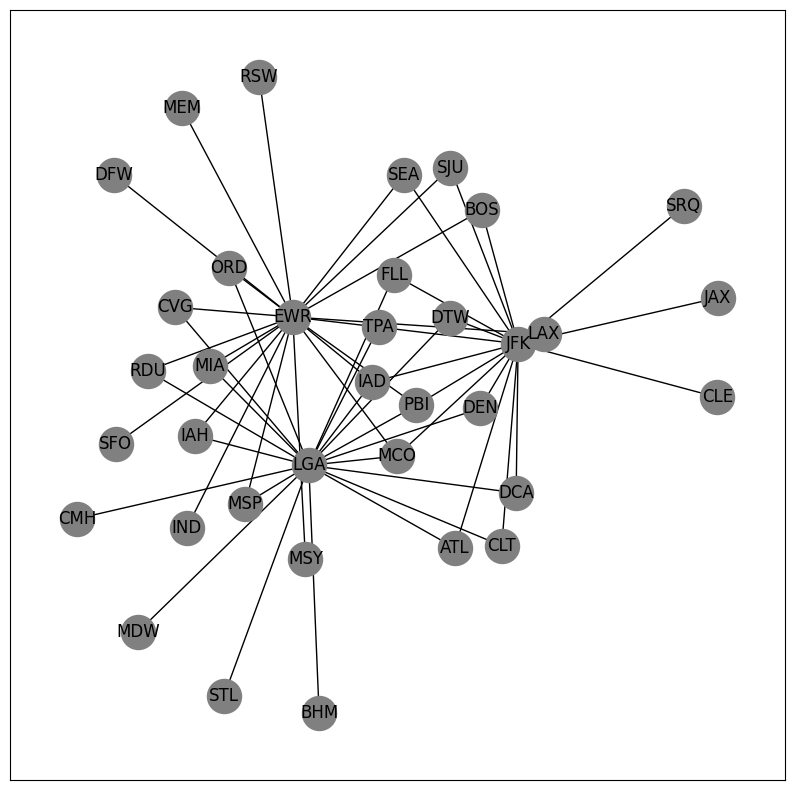

In [ ]:
plt.figure(figsize=(10,10))
import networkx as nx
FG = nx.from_pandas_edgelist(df, source='origin', target='dest', edge_attr=True)
FG.nodes()
FG.edges()
nx.draw_networkx(FG, with_labels=True, node_size=600, node_color='gray')
nx.algorithms.degree_centrality(FG)
nx.density(FG)
nx.average_shortest_path_length(FG)
nx.average_degree_connectivity(FG)


In [ ]:
origin = input('enter the starting city: ')
destination = input('enter the destination city: ')
shortest_path = nx.shortest_path(FG, source=origin, target=destination, weight='air_time')
total_air_time = nx.shortest_path_length(FG, source=origin, target=destination, weight='air_time')
total_distance = nx.shortest_path_length(FG, source=origin, target=destination, weight='distance')

print('Shortest path:', shortest_path)
print('Total air time taken for the flight:', total_air_time)
print('Total distance traveled:', total_distance)

enter the starting city: BHM
enter the destination city: EWR
Shortest path: ['BHM', 'LGA', 'IAD', 'EWR']
Total air time taken for the flight: 207.0
Total distance traveled: 1307
